<a href="https://colab.research.google.com/github/Arooj-Fatima14/Robotics_World-internship-/blob/main/Loan_defualt_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Random Forest


##Importing dataset from Kaggle

In [1]:
!pip install kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!mkdir ~/.kaggle

In [4]:
!cp /content/drive/MyDrive/internship/kaggle.json ~/.kaggle/kaggle.json

In [5]:
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
!kaggle datasets download kmldas/loan-default-prediction

Dataset URL: https://www.kaggle.com/datasets/kmldas/loan-default-prediction
License(s): copyright-authors
100% 109k/109k [00:00<00:00, 303kB/s]
100% 109k/109k [00:00<00:00, 303kB/s]


In [7]:
! unzip loan-default-prediction.zip

Archive:  loan-default-prediction.zip
  inflating: Default_Fin.csv         


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
df = pd.read_csv('Default_Fin.csv')
print(df.shape)


(10000, 5)


In [17]:
# df.head(50000)
df.tail(500)

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
9500,9501,0,24559.68,214927.56,1
9501,9502,0,16420.56,197396.64,0
9502,9503,0,15630.24,218529.72,0
9503,9504,1,14103.48,429960.60,0
9504,9505,0,3076.44,218410.56,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [18]:
df.columns

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

printing information of dataset


In [19]:
df.info

<bound method DataFrame.info of       Index  Employed  Bank Balance  Annual Salary  Defaulted?
0         1         1       8754.36      532339.56           0
1         2         0       9806.16      145273.56           0
2         3         1      12882.60      381205.68           0
3         4         1       6351.00      428453.88           0
4         5         1       9427.92      461562.00           0
...     ...       ...           ...            ...         ...
9995   9996         1       8538.72      635908.56           0
9996   9997         1       9095.52      235928.64           0
9997   9998         1      10144.92      703633.92           0
9998   9999         1      18828.12      440029.32           0
9999  10000         0       2411.04      202355.40           0

[10000 rows x 5 columns]>

In [21]:
for col in df.columns:
  print(df[col].value_counts())


Index
1        1
6671     1
6664     1
6665     1
6666     1
        ..
3334     1
3335     1
3336     1
3337     1
10000    1
Name: count, Length: 10000, dtype: int64
Employed
1    7056
0    2944
Name: count, dtype: int64
Bank Balance
0.00        499
12382.44      3
6273.24       3
9278.04       3
9324.24       3
           ... 
1327.92       1
5224.80       1
6465.00       1
12005.04      1
2411.04       1
Name: count, Length: 9227, dtype: int64
Annual Salary
231870.60    2
142868.16    2
230266.92    2
670712.76    2
577349.76    2
            ..
436022.64    1
537026.76    1
505584.12    1
324518.76    1
202355.40    1
Name: count, Length: 9989, dtype: int64
Defaulted?
0    9667
1     333
Name: count, dtype: int64


checking for null values in dataset

In [22]:
df.isnull().sum()

,0
Index,0
Employed,0
Bank Balance,0
Annual Salary,0
Defaulted?,0


In [33]:
x = df.iloc[:,0:4]
y = df.iloc[:,4]

In [34]:
x.shape

(10000, 4)

In [36]:
y.shape

(10000,)

splitting data into train and test set

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [44]:
x_train.shape

(7000, 4)

In [45]:
x_test.shape

(3000, 4)

In [46]:
y_train.shape

(7000,)

In [47]:
y_test.shape

(3000,)

# Feature Engineering

In [48]:
x_train.dtypes

,0
Index,int64
Employed,int64
Bank Balance,float64
Annual Salary,float64


In [49]:
x_train.head()

,Index,Employed,Bank Balance,Annual Salary
7681,7682,1,7287.36,437855.88
9031,9032,1,3998.16,352805.76
3691,3692,1,4558.92,468768.60
202,203,1,10998.00,309220.92
5625,5626,0,14312.40,259173.00


In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [54]:
x_train

array([[ 0.92782142,  0.6417629 , -0.4697353 ,  0.21687103],
       [ 1.39457716,  0.6417629 , -1.04028873, -0.31625018],
       [-0.45170112,  0.6417629 , -0.9430178 ,  0.41064179],
       ...,
       [-0.59933423, -1.55820787, -0.30366907, -1.47019889],
       [ 1.67601359, -1.55820787, -1.63804804, -1.47842568],
       [-0.78327057,  0.6417629 , -1.0311299 ,  1.39814409]])

Model with 100 estimators

In [55]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100)
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [56]:
predictions = classifier.predict(x_test)

In [57]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9716666666666667

Accuracy of the model

In [62]:
print("Model accuracy is: ", accuracy_score(y_test, predictions)*100)

Model accuracy is:  97.16666666666667


Model with 10 estimaotrs

In [68]:
from sklearn.ensemble import RandomForestClassifier
classifier2 = RandomForestClassifier(n_estimators=10)
classifier2.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10)

In [72]:
predictions2 = classifier2.predict(x_test)

In [73]:
predictions2

array([0, 0, 0, ..., 0, 0, 0])

In [74]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions2)

0.9686666666666667

In [75]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train, y_train)

RandomForestClassifier()

printing Feature importance score

In [76]:
feature_scores = pd.Series(clf.feature_importances_, index=x.columns).sort_values(ascending=False)

In [78]:
feature_scores

,0
Bank Balance,0.551854
Index,0.223795
Annual Salary,0.211098
Employed,0.013252


Visualizing Feature scores

```
# This is formatted as code
```



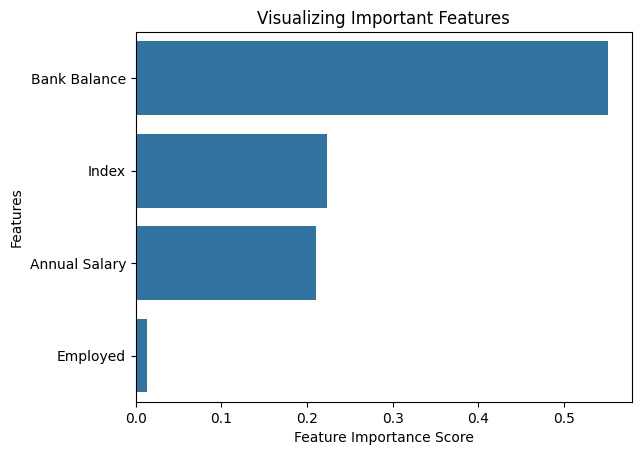

In [81]:
sns.barplot(x=feature_scores, y=feature_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

printing Confusion matrix

In [82]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[2873   14]
 [  71   42]]


In [83]:
cm

array([[2873,   14],
       [  71,   42]])

Classification report

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2887
           1       0.75      0.37      0.50       113

    accuracy                           0.97      3000
   macro avg       0.86      0.68      0.74      3000
weighted avg       0.97      0.97      0.97      3000



In [90]:
# prompt: take one instance from xtest and predict its value using model with 100 estimators and print its predicted and actual both outputs

# Take one instance from x_test
instance = x_test[230]

# Predict the value using the model with 100 estimators
prediction = classifier.predict([instance])

# Print the predicted and actual outputs
print("Predicted output:", prediction)
print("Actual output:", y_test.iloc[230])


Predicted output: [1]
Actual output: 1
